### Deep Learning, PyTorch Basics, and Neural Networks

**Segueway to Deep Learning: Why is Deep Learning a Necessity?**
Deep learning is a subset of machine learning that uses artificial neural networks to model and solve complex problems.

Traditional algorithms struggle with tasks like image recognition, natural language processing, and autonomous systems.

Deep learning, leveraging large datasets and powerful computational tools, has proven to:
- Excel in tasks requiring pattern recognition and feature extraction.
- Adapt to dynamic data through end-to-end learning.
- Achieve state-of-the-art results in areas like vision, speech, and generative modeling.

**What You'll Learn in This Notebook**
1. Introduction to PyTorch and its architecture.
2. How to implement neural networks using PyTorch (e.g., `torch.nn.Module` class).
3. Progress from foundational concepts to advanced model building techniques.

**Prerequisites**
- Python 3.x
- PyTorch version >= 1.9
- Matplotlib for visualizations
Ensure you have the required libraries installed using:
```bash
pip install torch matplotlib numpy
```

**Step 1: Import Libraries and Setup**

In [1]:
#!pip install torch matplotlib numpy

In [2]:
try:
    import torch
    import torch.nn as nn
    import torch.optim as optim
    import torch.nn.functional as F
    from torch.utils.data import DataLoader, Dataset
    import numpy as np
    import matplotlib.pyplot as plt
except ModuleNotFoundError as e:
    print("A required module is missing. Please install the necessary dependencies using the following:")
    print("pip install torch matplotlib numpy")
    raise e

# Check PyTorch version
print(f"PyTorch Version: {torch.__version__}")

PyTorch Version: 2.3.0


**Step 2: Introduction to PyTorch Tensors and Architecture**

PyTorch is a deep learning framework known for its dynamic computation graphs and tensor operations.

**Tensors**:
- Tensors are the core data structures in PyTorch, similar to NumPy arrays but with GPU acceleration.
- PyTorch tensors provide flexibility for dynamic graph construction, crucial for model debugging and design.

In [3]:
# Create tensors
tensor_a = torch.tensor([[1, 2], [3, 4]])
tensor_b = torch.ones((2, 2))

# Basic operations
print("Tensor A:", tensor_a)
print("Tensor B:", tensor_b)
print("A + B:", tensor_a + tensor_b)
print("A * 2:", tensor_a * 2)

# GPU acceleration (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tensor_gpu = tensor_a.to(device)
print("Tensor on GPU:", tensor_gpu)

Tensor A: tensor([[1, 2],
        [3, 4]])
Tensor B: tensor([[1., 1.],
        [1., 1.]])
A + B: tensor([[2., 3.],
        [4., 5.]])
A * 2: tensor([[2, 4],
        [6, 8]])
Tensor on GPU: tensor([[1, 2],
        [3, 4]])


**Step 3: Building and Using PyTorch Datasets**

**Dataset and DataLoader**:
- PyTorch provides classes like `Dataset` and `DataLoader` to efficiently handle data preparation and batching.
- These utilities simplify working with large datasets during training.

In [4]:
# Define a simple custom dataset
class CustomDataset(Dataset):
    def __init__(self, size=100):
        self.data = np.linspace(0, 1, size)
        self.labels = self.data ** 2

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor(self.data[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.float32)

# Create dataset and dataloader
dataset = CustomDataset(size=100)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Display a sample batch
for batch_data, batch_labels in dataloader:
    print("Batch Data:", batch_data)
    print("Batch Labels:", batch_labels)
    break

Batch Data: tensor([0.5556, 0.5354, 0.9394, 0.4444, 0.2424, 0.9596, 0.8788, 0.0606, 1.0000,
        0.8687])
Batch Labels: tensor([0.3086, 0.2866, 0.8825, 0.1975, 0.0588, 0.9208, 0.7723, 0.0037, 1.0000,
        0.7546])


**Step 4: Implementing a Neural Network in PyTorch**

**torch.nn.Module**:
- PyTorch's `torch.nn.Module` is the base class for all neural networks.
- Layers and forward passes are defined within this class.

In [5]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model
model = SimpleNN()
print(model)

SimpleNN(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)


**Step 5: Training the Neural Network**

Training involves:
- Forward propagation to calculate predictions.
- Calculating the loss to evaluate the prediction's accuracy.
- Backpropagation to update weights and minimize loss.

Epoch 1/20, Loss: 0.1022
Epoch 2/20, Loss: 0.1813
Epoch 3/20, Loss: 0.1031
Epoch 4/20, Loss: 0.0811
Epoch 5/20, Loss: 0.1031
Epoch 6/20, Loss: 0.1105
Epoch 7/20, Loss: 0.0949
Epoch 8/20, Loss: 0.0875
Epoch 9/20, Loss: 0.0732
Epoch 10/20, Loss: 0.1077
Epoch 11/20, Loss: 0.0632
Epoch 12/20, Loss: 0.0714
Epoch 13/20, Loss: 0.0738
Epoch 14/20, Loss: 0.0505
Epoch 15/20, Loss: 0.0571
Epoch 16/20, Loss: 0.0490
Epoch 17/20, Loss: 0.0530
Epoch 18/20, Loss: 0.0410
Epoch 19/20, Loss: 0.0573
Epoch 20/20, Loss: 0.0618


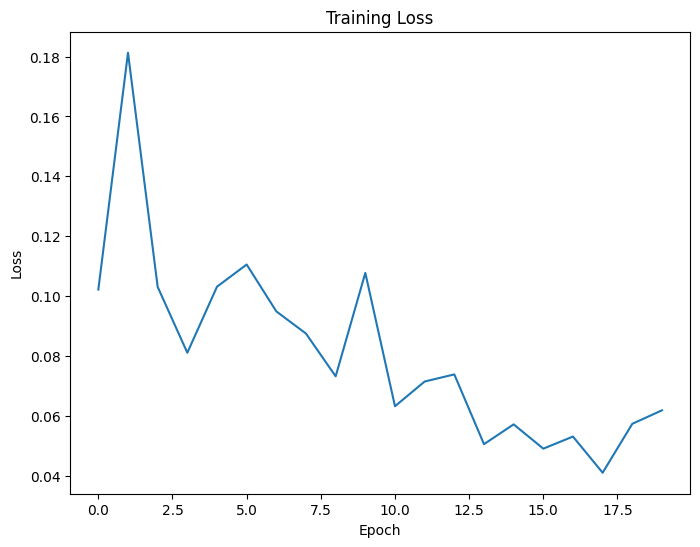

In [6]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 20
losses = []

for epoch in range(num_epochs):
    for batch_data, batch_labels in dataloader:
        # Forward pass
        predictions = model(batch_data.unsqueeze(1))
        loss = criterion(predictions, batch_labels.unsqueeze(1))

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    losses.append(loss.item())
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")

# Plot training loss
plt.figure(figsize=(8, 6))
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

**Step 6: Evaluating the Neural Network**

After training, evaluate the model with new data.

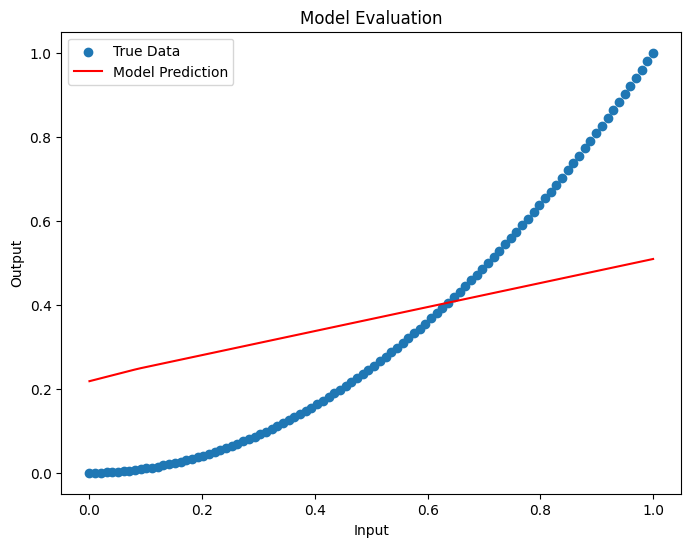

In [7]:
x_test = torch.linspace(0, 1, 100).unsqueeze(1)
y_test = model(x_test).detach()

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(dataset.data, dataset.labels, label="True Data")
plt.plot(x_test, y_test, label="Model Prediction", color="red")
plt.title("Model Evaluation")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.show()

**Step 7: Modularizing the Model for Scalability**

Modularize models to improve reusability and scalability. Advanced techniques include:

In [8]:
class ModularNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ModularNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.layers(x)

# Initialize the modular model
modular_model = ModularNN(input_size=1, hidden_size=20, output_size=1)
print(modular_model)

ModularNN(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=1, bias=True)
  )
)


**Summary**
- PyTorch provides a dynamic and efficient framework for deep learning.
- Core components include tensors, datasets, and neural networks implemented using `torch.nn.Module`.
- Modularizing your model ensures scalability and maintainability.
Continue exploring convolutional neural networks (CNNs) and recurrent neural networks (RNNs) for more advanced tasks.